<a href="https://colab.research.google.com/github/entc-17-fyp-20/ResultsComparison/blob/Kusal/ARIMA_SlidingWindow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns
# sns.set(rc={'figure.figsize':(15,6)})
import statsmodels.api as sm

# color = sns.color_palette()
# sns.set_style('darkgrid')

In [199]:
df = pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Belgium_2017_15_min.csv')
df=pd.DataFrame(df)
df.head()
df=df[::-1]
df

,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
26403,2017-04-01 00:00:00+02:00,PT15M,Onshore,Flanders,Elia,2.339,1.951,0.686,3.723,0.840,...,2.543,2.443,0.381,4.273,16.105,2.418,29.813,63.01,0.037119,0
26402,2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.850,2.242,0.635,4.392,1.204,...,3.259,2.754,0.435,4.909,16.289,2.500,30.100,63.01,0.045227,0
26401,2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.598,2.532,0.581,5.061,1.564,...,3.974,3.064,0.487,5.544,16.476,2.583,30.386,63.01,0.057102,0
26400,2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.912,2.823,0.530,5.730,1.928,...,4.690,3.375,0.541,6.180,16.660,2.665,30.673,63.01,0.062086,0
26399,2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.574,3.208,0.481,6.564,2.467,...,5.670,3.780,0.611,6.956,16.811,2.734,30.908,63.01,0.072586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.720,43.428,37.612,48.212,44.818,...,49.646,44.447,37.222,49.958,30.700,14.101,46.549,53.86,0.700333,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.592,43.966,38.630,48.302,45.318,...,49.635,44.911,38.134,49.943,30.647,13.975,46.553,53.86,0.753665,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.743,44.447,39.569,48.416,45.747,...,49.595,45.354,39.074,49.894,30.595,13.860,46.546,53.86,0.775024,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.191,44.927,40.507,48.534,46.175,...,49.555,45.797,40.015,49.841,30.543,13.741,46.538,53.86,0.783354,0


In [200]:
col_1=(df.columns)[0]
col_2=(df.columns)[5]
feature = 'Active Power'
feature_1 = 'Forecasted Power'
df.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)

In [201]:
df=df[['Date & Time', 'Active Power']]
# df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%m/%d/%Y %H:%M")
df=df.set_index('Date & Time')

df.tail()

,Active Power
Date & Time,
2017-12-31 22:45:00+01:00,37.720
2017-12-31 23:00:00+01:00,40.592
2017-12-31 23:15:00+01:00,41.743
2017-12-31 23:30:00+01:00,42.191
2017-12-31 23:45:00+01:00,40.670


In [202]:
# df=df[1000:11000]

In [203]:
train,test = df[:320],df[320:400]

In [204]:
data=np.array(df)

In [205]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train=pd.DataFrame(train[feature])
# train[feature] = scaler.fit_transform(train)
# train

In [206]:
print(test.describe())
print(train.describe())

       Active Power
count     80.000000
mean       5.888112
std        3.743789
min        1.291000
25%        2.149500
50%        5.875000
75%        9.032500
max       14.442000
       Active Power
count    320.000000
mean       3.578381
std        2.687563
min        0.824000
25%        1.833500
50%        2.662000
75%        4.676500
max       16.129000


<Figure size 1080x432 with 0 Axes>

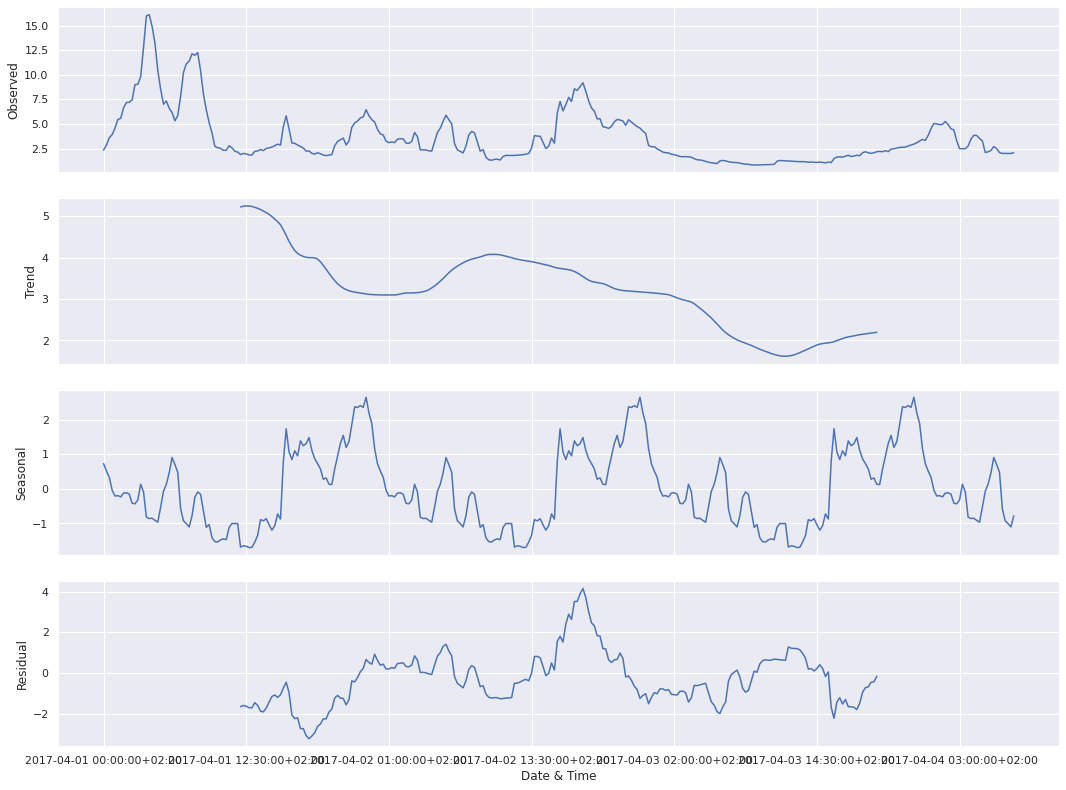

In [207]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='additive',freq=96)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

plot the ACF and Pacf to know about P and Q value



*   Statistical correlation summarizes the strength of the relationship between two variables
*   ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot
* ACF Determines the coefficient of MA model (p)
* PACF is a partial auto-correlation function which is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed .Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals
* PACF determines the coefficients of AR model (q)


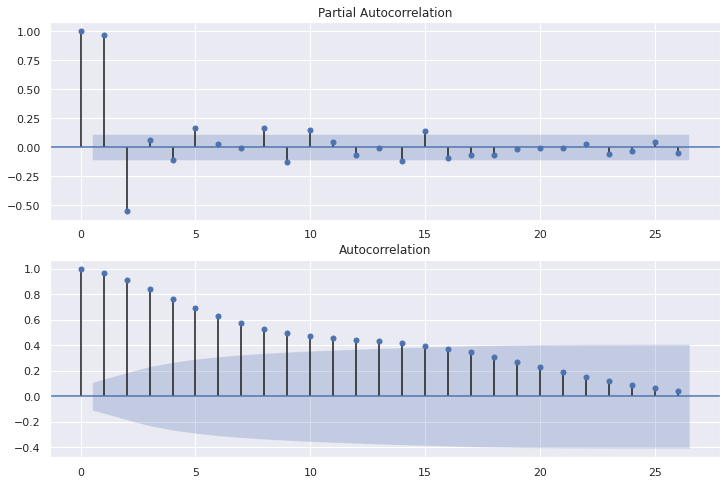

In [208]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_pacf(train,ax=ax1);
ax2 = fig.add_subplot(212)
plot_acf(train,ax=ax2);

**Checking stationarity**
* By seeing plot
* Summary Statistics (mean and variance)
* Statistical Tests


In [209]:
# # plt.figure(figsize=(15,6))
# plt.plot(train["Active Power"])


### Augmented Dickey-Fuller test
* it determines how strongly a time series is defined by a trend

* p-value below a threshold (such as 5% or 1%) suggest 
stationary, otherwise a p-value above the threshold suggests non-stationary

In [210]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):    
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [211]:
check_stationarity(df['Active Power'])

The test statistic: -13.230651
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [212]:
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (3, 1, 1)
model = ARIMA(train, order=(p,d,q)) 

model = model.fit(disp=0)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Active Power   No. Observations:                  319
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -271.658
Method:                       css-mle   S.D. of innovations              0.567
Date:                Sun, 29 May 2022   AIC                            555.317
Time:                        16:57:25   BIC                            577.908
Sample:                    04-01-2017   HQIC                           564.339
                         - 04-04-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0008      0.062      0.013      0.989      -0.121       0.123
ar.L1.D.Active Power     0.1007      0.243      0.415      0.679      -0.376       0.577
ar.L2.D.Acti

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)


# Forecast with ARIMA Model

In [213]:
forecast1 = model.forecast(steps=80)[0]

In [214]:
forecast1

array([2.10543255, 2.11893873, 2.1293433 , 2.13464306, 2.13776209,
       2.13988178, 2.14136319, 2.14254252, 2.14356084, 2.1444922 ,
       2.14537915, 2.14624249, 2.14709343, 2.14793789, 2.14877892,
       2.14961817, 2.15045647, 2.15129428, 2.15213183, 2.15296924,
       2.15380658, 2.15464389, 2.15548117, 2.15631845, 2.15715572,
       2.15799298, 2.15883025, 2.15966751, 2.16050477, 2.16134203,
       2.1621793 , 2.16301656, 2.16385382, 2.16469108, 2.16552835,
       2.16636561, 2.16720287, 2.16804013, 2.1688774 , 2.16971466,
       2.17055192, 2.17138918, 2.17222645, 2.17306371, 2.17390097,
       2.17473823, 2.1755755 , 2.17641276, 2.17725002, 2.17808728,
       2.17892455, 2.17976181, 2.18059907, 2.18143633, 2.18227359,
       2.18311086, 2.18394812, 2.18478538, 2.18562264, 2.18645991,
       2.18729717, 2.18813443, 2.18897169, 2.18980896, 2.19064622,
       2.19148348, 2.19232074, 2.19315801, 2.19399527, 2.19483253,
       2.19566979, 2.19650706, 2.19734432, 2.19818158, 2.19901

In [215]:
test

,Active Power
Date & Time,
2017-04-04 08:00:00+02:00,1.987
2017-04-04 08:15:00+02:00,1.813
2017-04-04 08:30:00+02:00,1.873
2017-04-04 08:45:00+02:00,1.795
2017-04-04 09:00:00+02:00,1.730
...,...
2017-04-05 02:45:00+02:00,9.107
2017-04-05 03:00:00+02:00,9.016
2017-04-05 03:15:00+02:00,9.186


In [216]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, forecast1)
print('Test MSE: %.3f' % error)


Test MSE: 27.532


In [217]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, forecast1)
print('Test MSE: %.3f' % error)


Test MSE: 27.532


In [218]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, forecast1)
print('Test MSE: %.3f' % error)

Test MSE: 27.532


In [219]:
# forecast1[:200]

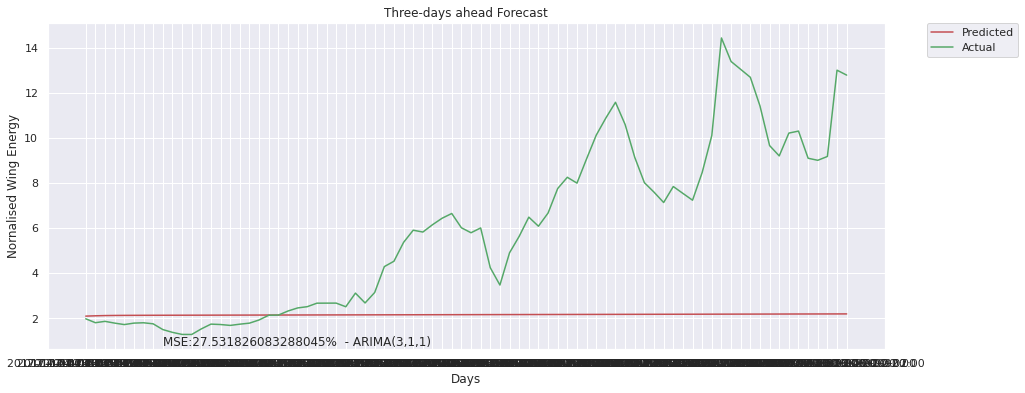

In [220]:
plt.plot(forecast1,c='r', label='Predicted')
plt.plot(test,c = 'g', label='Actual')
plt.title("Three-days ahead Forecast")
plt.xlabel("Days")
plt.ylabel("Nornalised Wing Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
s = 'MSE:' + str(error) + '% ' + ' - ARIMA('+str(p)+','+str(d)+','+str(q)+')'
plt.text(8,0.8,s)
plt.show()

In [226]:
test

,Active Power
Date & Time,
2017-04-04 08:00:00+02:00,1.987
2017-04-04 08:15:00+02:00,1.813
2017-04-04 08:30:00+02:00,1.873
2017-04-04 08:45:00+02:00,1.795
2017-04-04 09:00:00+02:00,1.730
...,...
2017-04-05 02:45:00+02:00,9.107
2017-04-05 03:00:00+02:00,9.016
2017-04-05 03:15:00+02:00,9.186


In [221]:
n=1
p = 3
d = 1
q = 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=n)[0] 
global_for = []
for i in range(80):
  global_for.append(forecast[i%n])  
  if(i%n==0):
    train = data[:len(train)+n]
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=n)[0] 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [232]:
global_for

array([ 2.05966914,  1.94748569,  1.7657996 ,  1.85973853,  1.77122957,
        1.71585212,  1.79135696,  1.84726896,  1.72746288,  1.36024863,
        1.36637831,  1.20559191,  1.30870689,  1.68390893,  1.80632259,
        1.76047923,  1.6642581 ,  1.75630537,  1.85131783,  1.97852327,
        2.2589045 ,  2.1581145 ,  2.41509915,  2.54216268,  2.54859923,
        2.76306714,  2.67380333,  2.69055598,  2.43313301,  3.46913932,
        2.38368964,  3.50490039,  4.82593784,  4.57970977,  5.97706595,
        6.00140306,  5.86682132,  6.42102768,  6.39621924,  6.95278629,
        5.61468638,  5.6887268 ,  6.25047999,  3.17961486,  3.42608188,
        5.5161225 ,  5.75594478,  6.77600437,  5.5821112 ,  7.16036336,
        8.02986326,  8.51355214,  7.98230587,  9.46237002, 10.59905668,
       11.12629622, 11.78510705, 10.1869157 ,  8.58219866,  7.3480959 ,
        7.52482622,  6.87174263,  8.22168262,  7.33335718,  7.19775639,
        9.09164296, 10.8026726 , 16.9173397 , 12.41511179, 12.99

In [233]:
Result_D={"Date & Time":test.index,"Actual Active Power":test['Active Power'],"Predicted Active Power":global_for}

In [234]:
Result_Df= pd.DataFrame(Result_D)
Result_Df

,Date & Time,Actual Active Power,Predicted Active Power
Date & Time,,,
2017-04-04 08:00:00+02:00,2017-04-04 08:00:00+02:00,1.987,2.059669
2017-04-04 08:15:00+02:00,2017-04-04 08:15:00+02:00,1.813,1.947486
2017-04-04 08:30:00+02:00,2017-04-04 08:30:00+02:00,1.873,1.765800
2017-04-04 08:45:00+02:00,2017-04-04 08:45:00+02:00,1.795,1.859739
2017-04-04 09:00:00+02:00,2017-04-04 09:00:00+02:00,1.730,1.771230
...,...,...,...
2017-04-05 02:45:00+02:00,2017-04-05 02:45:00+02:00,9.107,10.276698
2017-04-05 03:00:00+02:00,2017-04-05 03:00:00+02:00,9.016,8.547108
2017-04-05 03:15:00+02:00,2017-04-05 03:15:00+02:00,9.186,9.114971


In [223]:
global_for = np.array(global_for)
from sklearn.metrics import mean_squared_error, r2_score
error = mean_squared_error(test, global_for)
#error = (np.mean(np.abs((test-global_for)/test))*100) 
var = r2_score(test, global_for)
print('Test MSE: %.3f ' % error)
print('Test Variance : %.3f ' % var)

Test MSE: 0.918 
Test Variance : 0.934 


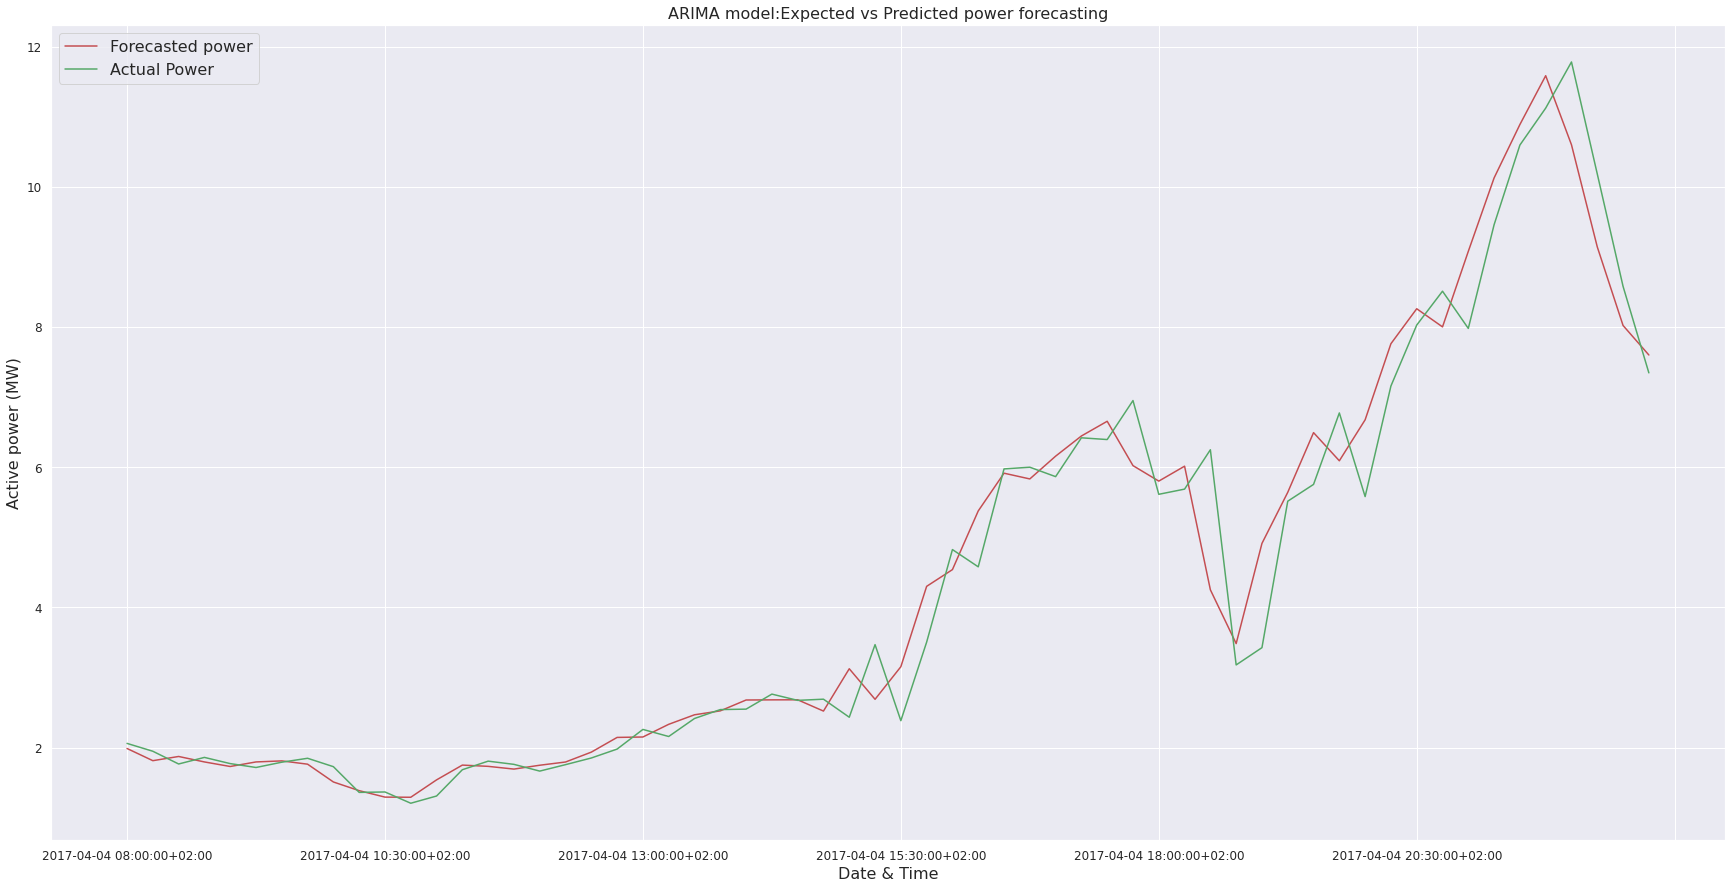

In [251]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")
Result_Df[:60].plot(x='Date & Time', y=['Actual Active Power','Predicted Active Power'], style=['r','g'],fontsize=12, figsize=(30, 15))
plt.title("ARIMA model:Expected vs Predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.legend(['Forecasted power', 'Actual Power'],fontsize=16)
plt.savefig("ARIMA-results.pdf")
plt.savefig("ARIMA-results.svg")
plt.show()

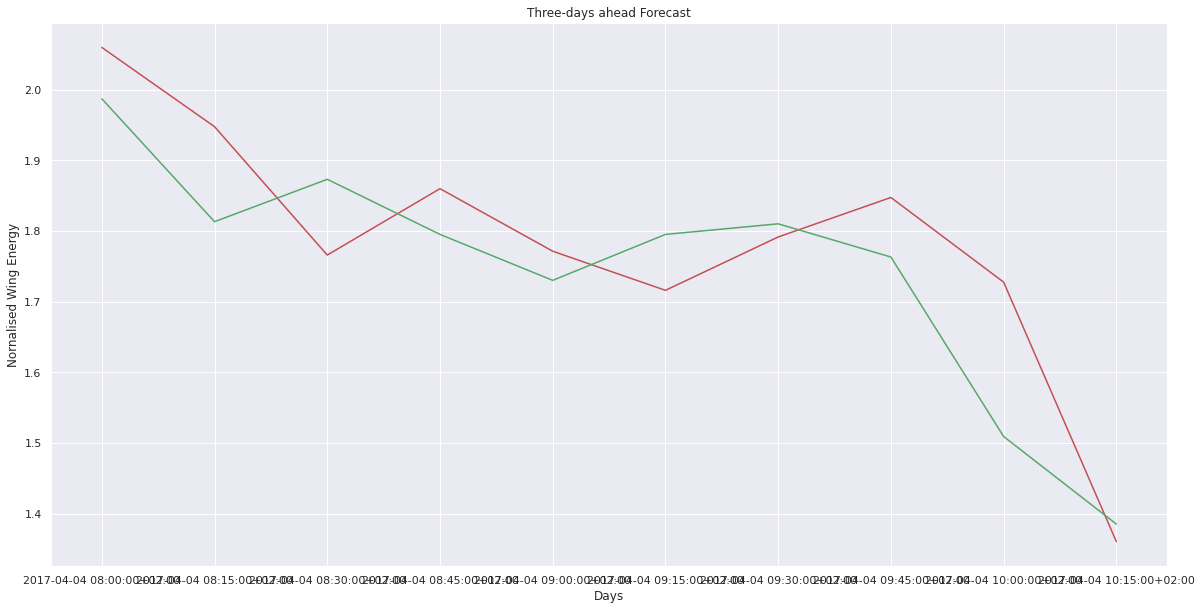

In [225]:
plt.figure(figsize=(20,10))
plt.plot(global_for[:10],c='r', label='Predicted')
plt.plot(test[:10],c = 'g', label='Actual')
plt.title("Three-days ahead Forecast")
plt.xlabel("Days")
plt.ylabel("Nornalised Wing Energy")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
s = 'MSE:' + str(error) + '% ' + ' - ARIMA('+str(p)+','+str(d)+','+str(q)+')'
# plt.text(8,0.8,s)
plt.show()